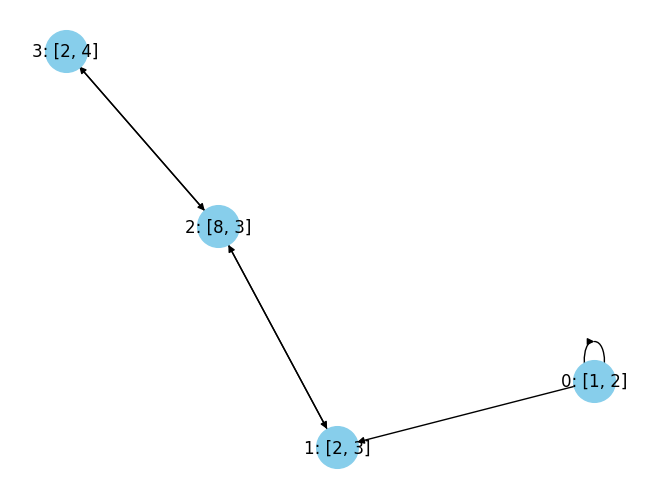

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

# 创建图
G = nx.DiGraph()

# 添加四个节点
nodes = [0, 1, 2, 3]
G.add_nodes_from(nodes)

# 添加节点属性，这个节点属性表示0号节点实际表示的张量
node_attributes = {0: '[1, 2]', 1: '[2, 3]', 2: '[8, 3]', 3: '[2, 4]'}
nx.set_node_attributes(G, node_attributes, 'embeddings')

# 添加边（使用edge_index）
edge_index = [(0, 0), (0, 1), (1, 2), (2, 1), (2, 3), (3, 2)]
G.add_edges_from(edge_index)

# 获取节点标签
node_labels = nx.get_node_attributes(G, 'embeddings')

pos = nx.spring_layout(G)  # 使用Spring布局算法布局节点

# 绘制图
nx.draw(G, pos, with_labels=False, node_size=900, node_color="skyblue", font_size=15, font_color="black")

# 在节点旁边添加节点属性
nx.draw_networkx_labels(G, pos, font_color="black", labels={k: f'{k}: {v}' for k, v in node_labels.items()})

# 显示图形
plt.show()

In [3]:
import torch
from torch_geometric.nn import MessagePassing

x = torch.tensor([[1, 2],   # node1：是一个2维张量[1,2]
                  [2, 3],
                  [8, 3],
                  [2, 4]])
edge_index = torch.tensor([[0, 0, 1, 2, 2, 3],  # 竖着看，从0-0,0-1,1-2,2-1,2-3,3-2有边，即第1行是起始点，第2行是终止点
                           [0, 1, 2, 1, 3, 2]])

class MessagePassingLayer(MessagePassing):
    def __init__(self):
        # 将所有信息相加，更新中心节点，谁是终止节点，谁就是中心节点
        super(MessagePassingLayer, self).__init__(aggr='add')
    def forward(self, x, edge_index):
        "propagate()内部调用message()函数，并将x_j传入给message()"
        return self.propagate(x=x, edge_index=edge_index)
    def message(self, x_i, x_j):
        print(x_i) # 中心节点特征
        print(x_j) # 邻居节点特征
        return x_j

MessagePassingLayer = MessagePassingLayer()
output = MessagePassingLayer(x, edge_index)
print(output)

tensor([[1, 2],
        [2, 3],
        [8, 3],
        [2, 3],
        [2, 4],
        [8, 3]])
tensor([[1, 2],
        [1, 2],
        [2, 3],
        [8, 3],
        [8, 3],
        [2, 4]])
tensor([[1, 2],
        [9, 5],
        [4, 7],
        [8, 3]])
